<a href="https://colab.research.google.com/github/jefferson2601/Avalia-o-de-produtos/blob/main/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sn
import scipy.stats as stats


In [4]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [9]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
base = base.drop(['Unnamed: 0'], axis=1)

<Axes: >

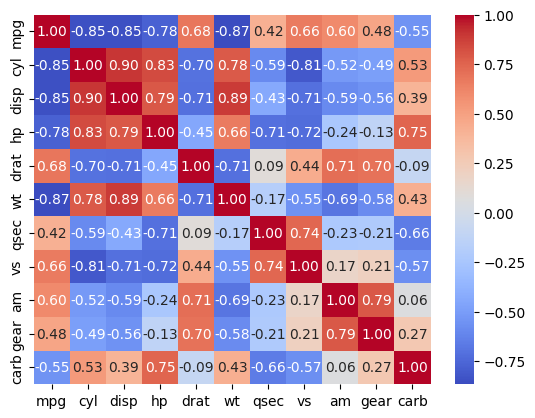

In [15]:
corr = base.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

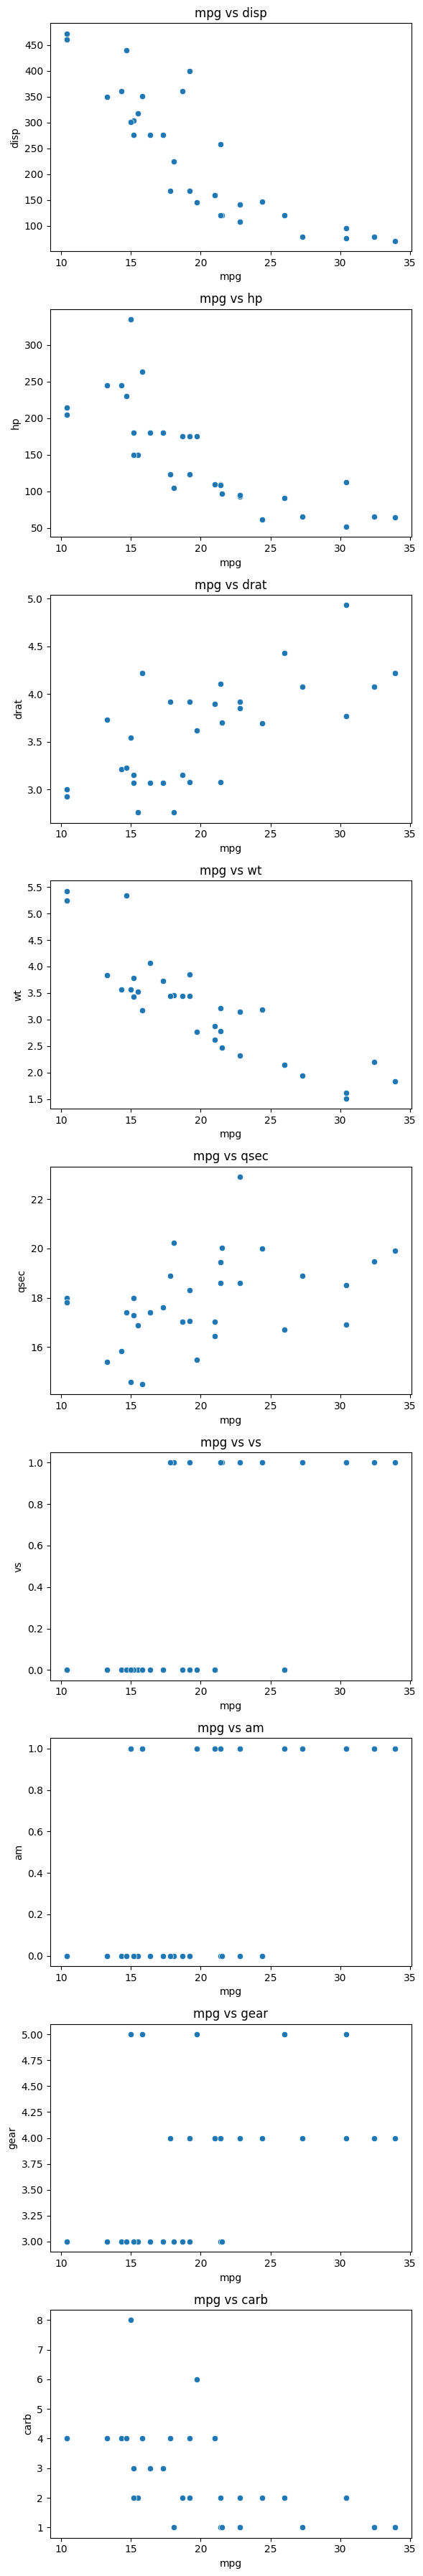

In [16]:
column_pairs = [('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'drat'), ('mpg', 'wt'), ('mpg', 'qsec'), ('mpg', 'vs'), ('mpg', 'am'), ('mpg', 'gear'), ('mpg', 'carb')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6, 4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [35]:
#modelo = sn.ols(formula='mpg ~ wt + disp + hp', data=base)

modelo = sn.ols(formula='mpg ~ drat + vs', data=base)
modelo = modelo.fit()
modelo.summary()
#aic 156.6 e bic 162.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           5.82e-07
Time:                        13:31:55   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

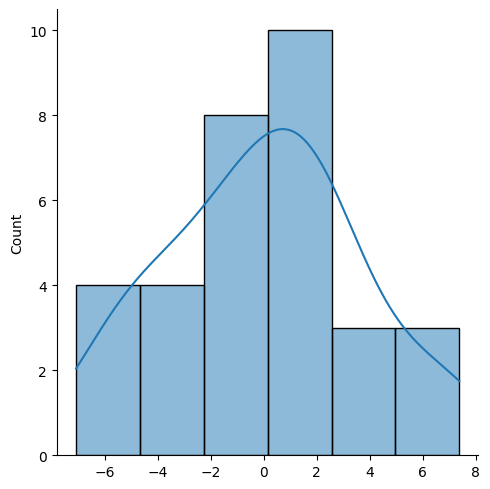

In [36]:
residuos = modelo.resid
sns.displot(residuos, kde=True)


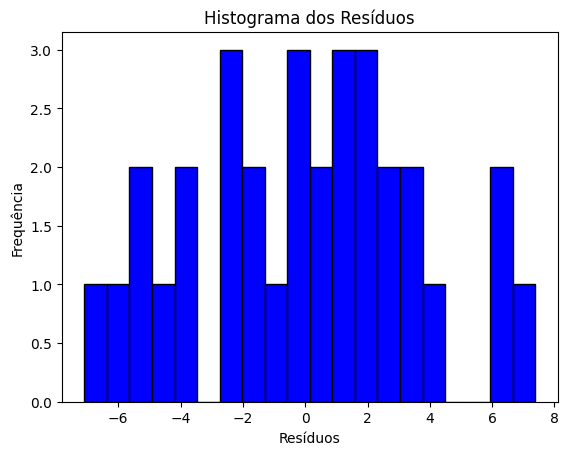

In [37]:
residuos = modelo.resid
plt.hist(residuos, bins=20, color='blue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

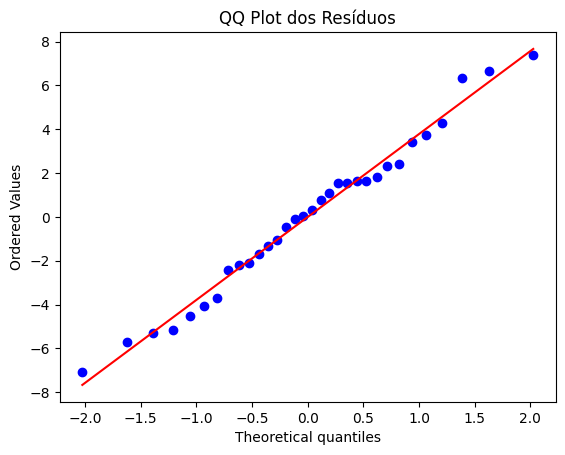

In [38]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()

In [39]:
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statística: {stat: .3f}, p-value: {pval:.3f}')


Shapiro-Wilk statística:  0.981, p-value: 0.822
